In [191]:
import os
os.getcwd()

'c:\\Users\\sevva\\Desktop\\ICUDATASET'

In [192]:
import seaborn as sns

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
os.listdir()

['ADMISSIONS.csv', 'ICU.ipynb', 'ICUSTAYS.csv', 'PATIENTS.csv']

In [195]:
import pandas as pd

df = pd.read_csv("ICUSTAYS.csv")

In [196]:
df.head()

,row_id,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,outtime,los
0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325
1,12747,10011,105331,232110,carevue,MICU,MICU,15,15,2126-08-14 22:34:00,2126-08-28 18:59:00,13.8507
2,12749,10013,165520,264446,carevue,MICU,MICU,15,15,2125-10-04 23:38:00,2125-10-07 15:13:52,2.6499
3,12754,10017,199207,204881,carevue,CCU,CCU,7,7,2149-05-29 18:52:29,2149-05-31 22:19:17,2.1436
4,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43:56,2163-05-16 03:47:04,1.2938


In [197]:
df.shape


(136, 12)

In [198]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          136 non-null    int64  
 1   subject_id      136 non-null    int64  
 2   hadm_id         136 non-null    int64  
 3   icustay_id      136 non-null    int64  
 4   dbsource        136 non-null    object 
 5   first_careunit  136 non-null    object 
 6   last_careunit   136 non-null    object 
 7   first_wardid    136 non-null    int64  
 8   last_wardid     136 non-null    int64  
 9   intime          136 non-null    object 
 10  outtime         136 non-null    object 
 11  los             136 non-null    float64
dtypes: float64(1), int64(6), object(5)
memory usage: 12.9+ KB


In [199]:
df.isnull().sum()

row_id            0
subject_id        0
hadm_id           0
icustay_id        0
dbsource          0
first_careunit    0
last_careunit     0
first_wardid      0
last_wardid       0
intime            0
outtime           0
los               0
dtype: int64

In [200]:
df.describe()

,row_id,subject_id,hadm_id,icustay_id,first_wardid,last_wardid,los
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,29370.316176,28263.485294,153259.566176,250980.470588,34.470588,34.022059,4.452457
std,14550.435239,16008.281510,28054.220280,28455.125832,18.876182,19.280951,6.196828
min,12742.000000,10006.000000,100375.000000,201006.000000,7.000000,7.000000,0.105900
25%,12826.750000,10089.750000,129028.000000,224359.250000,14.750000,14.000000,1.233525
50%,41427.000000,40307.000000,157724.000000,250055.000000,33.000000,33.000000,2.111450
75%,42073.750000,42207.000000,174896.500000,277279.250000,52.000000,52.000000,4.329050
max,42714.000000,44228.000000,199395.000000,298685.000000,57.000000,57.000000,35.406500


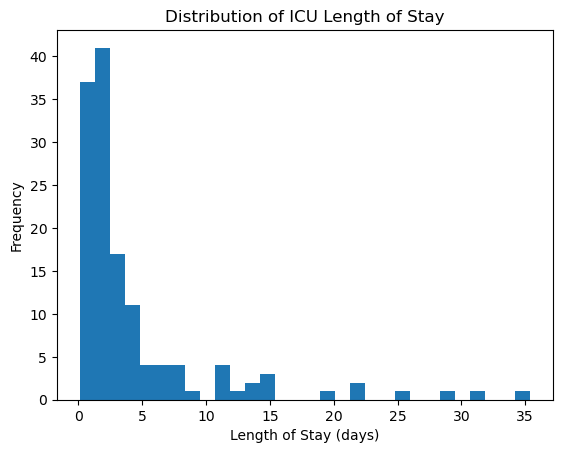

In [201]:
import matplotlib.pyplot as plt
icustays = pd.read_csv("ICUSTAYS.csv")

plt.hist(icustays["los"], bins=30)
plt.xlabel("Length of Stay (days)")
plt.ylabel("Frequency")
plt.title("Distribution of ICU Length of Stay")
plt.show()

In [202]:
icustays["los"].mean(), icustays["los"].median()

(4.452456617647059, 2.1114499999999996)

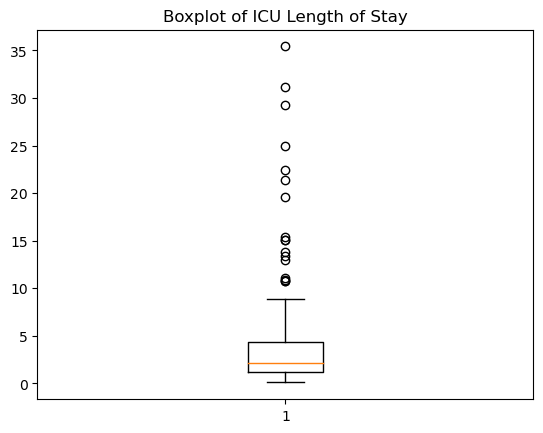

In [203]:
plt.boxplot(icustays["los"])
plt.title("Boxplot of ICU Length of Stay")
plt.show()

In [204]:
icustays["first_wardid"].value_counts()

first_wardid
52    31
23    19
50    18
57    17
7     15
14    10
33     9
12     9
15     8
Name: count, dtype: int64

In [205]:

import numpy as np

icustays["LOS_category"] = pd.cut(
    icustays["los"],
    bins=[0, 2, 7, 30, 100],
    labels=["Short (0-2)", "Medium (2-7)", "Long (7-30)", "Very Long (30+)"]
)

icustays["LOS_category"].value_counts()

LOS_category
Short (0-2)        63
Medium (2-7)       48
Long (7-30)        23
Very Long (30+)     2
Name: count, dtype: int64

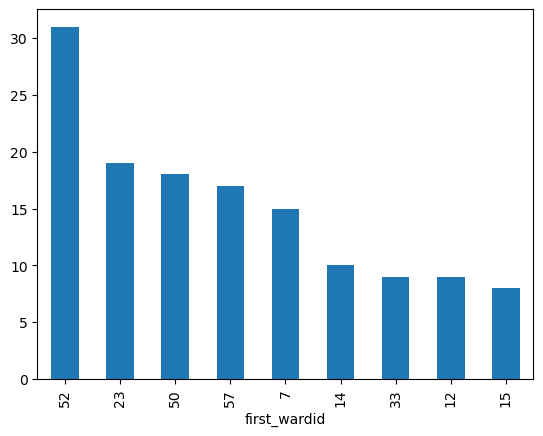

In [206]:
icustays["first_wardid"].value_counts().plot(kind="bar")
plt.show()

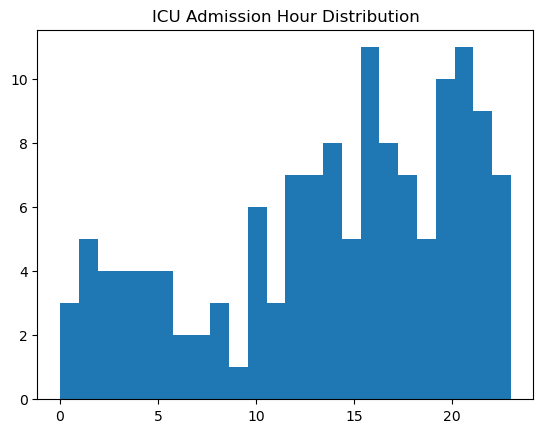

In [207]:
icustays["intime"] = pd.to_datetime(icustays["intime"])
icustays["admission_hour"] = icustays["intime"].dt.hour

plt.hist(icustays["admission_hour"], bins=24)
plt.title("ICU Admission Hour Distribution")
plt.show()

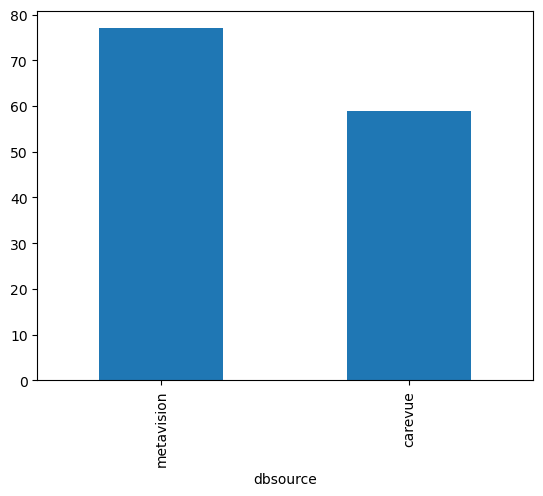

In [208]:
icustays["dbsource"].value_counts().plot(kind="bar")
plt.show()

In [209]:
ADMISSIONS

NameError: name 'ADMISSIONS' is not defined

In [ ]:
admissions = pd.read_csv("ADMISSIONS.csv")
admissions.shape

(129, 19)

In [ ]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

In [ ]:
admissions.isnull().sum()

row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
discharge_location       0
insurance                0
language                48
religion                 1
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
has_chartevents_data     0
dtype: int64

In [ ]:
admissions.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [ ]:
admissions["hospital_expire_flag"].value_counts()


hospital_expire_flag
0    89
1    40
Name: count, dtype: int64

In [ ]:
admissions["hospital_expire_flag"].mean()

0.31007751937984496

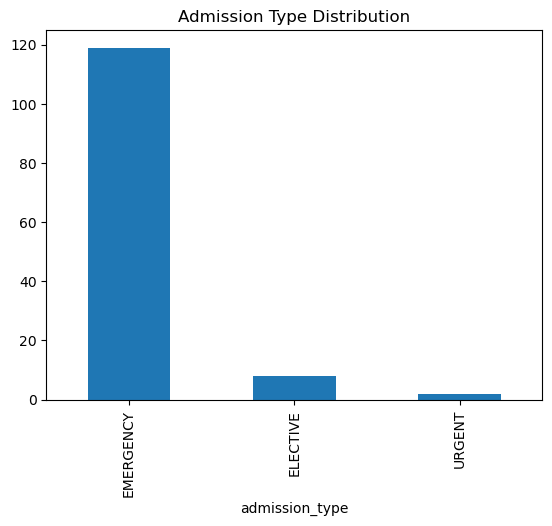

In [ ]:
admissions["admission_type"].value_counts().plot(kind="bar")
plt.title("Admission Type Distribution")
plt.show()

In [ ]:
admissions["admittime"] = pd.to_datetime(admissions["admittime"])
admissions["dischtime"] = pd.to_datetime(admissions["dischtime"])

admissions["hospital_los"] = (
    admissions["dischtime"] - admissions["admittime"]
).dt.total_seconds() / (60*60*24)

admissions["hospital_los"].describe()

count    129.000000
mean       9.332332
std       12.720450
min        0.038194
25%        3.314583
50%        6.634028
75%       10.645139
max      123.984722
Name: hospital_los, dtype: float64

In [ ]:
admissions.groupby("admission_type")["hospital_expire_flag"].mean()

admission_type
ELECTIVE     0.000000
EMERGENCY    0.327731
URGENT       0.500000
Name: hospital_expire_flag, dtype: float64

In [ ]:
admissions["admission_type"].value_counts()

admission_type
EMERGENCY    119
ELECTIVE       8
URGENT         2
Name: count, dtype: int64

In [ ]:

patients = pd.read_csv("PATIENTS.csv")
patients.info()
patients.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       100 non-null    int64 
 1   subject_id   100 non-null    int64 
 2   gender       100 non-null    object
 3   dob          100 non-null    object
 4   dod          100 non-null    object
 5   dod_hosp     70 non-null     object
 6   dod_ssn      77 non-null     object
 7   expire_flag  100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


,row_id,subject_id,expire_flag
count,100.000000,100.000000,100.0
mean,20452.580000,26162.330000,1.0
std,10982.043163,16201.834705,0.0
min,9467.000000,10006.000000,1.0
25%,9526.500000,10068.500000,1.0
50%,20209.000000,25128.000000,1.0
75%,31391.250000,42276.500000,1.0
max,31872.000000,44228.000000,1.0


In [ ]:
patients["gender"].value_counts()

gender
F    55
M    45
Name: count, dtype: int64

In [211]:
patients["dob"] = pd.to_datetime(patients["dob"])
patients["age"] = (pd.to_datetime("2026-01-01") - patients["dob"]).dt.days / 365

In [212]:
icu = pd.read_csv("ICUSTAYS.csv")
patients = pd.read_csv("PATIENTS.csv")
admissions = pd.read_csv("ADMISSIONS.csv")

In [213]:
df = icu.merge(admissions[["subject_id", "hadm_id", 
                           "hospital_expire_flag", "admittime"]],
               on=["subject_id", "hadm_id"],
               how="left")

In [214]:
df = df.merge(patients[["subject_id", "dob"]],
              on="subject_id",
              how="left")

In [216]:
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")
df["admittime"] = pd.to_datetime(df["admittime"], errors="coerce")

df["age"] = df["admittime"].dt.year - df["dob"].dt.year

In [217]:
df = df[(df["age"] > 0) & (df["age"] < 120)]

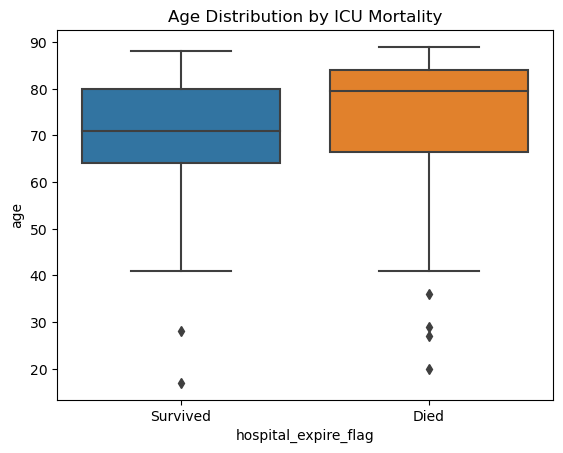

In [218]:
sns.boxplot(x="hospital_expire_flag", y="age", data=df)
plt.xticks([0,1], ["Survived", "Died"])
plt.title("Age Distribution by ICU Mortality")
plt.show()

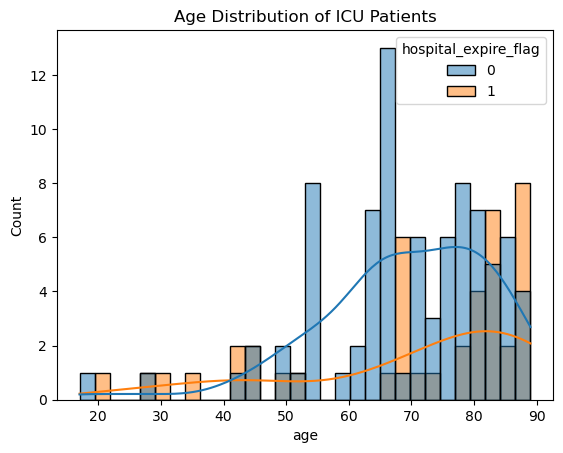

In [219]:
sns.histplot(data=df, x="age", hue="hospital_expire_flag",
             bins=30, kde=True)
plt.title("Age Distribution of ICU Patients")
plt.show()

In [221]:
df.groupby("hospital_expire_flag")["age"].mean()

hospital_expire_flag
0    69.164706
1    69.976190
Name: age, dtype: float64